![UTFSM](https://github.com/tclaudioe/Scientific-Computing-V3/blob/main/images/Departamento%20de%20Inform%C3%A1tica%20cromatica%20negra%404x-8.png?raw=true)
# INF-285 - Computación Científica
## Newton's Method in $\mathbb{R}^n$
## Version: 1.09

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tclaudioe/Scientific-Computing-V3/blob/main/Bonus%20-%20current/Bonus%20-%2004%20-%20Newton%20Rn.ipynb)

<a id="toc"></a>

# Table of Contents
* [Newton's method](#newton)
* [Python Modules and Functions](#py)
* [Acknowledgements](#acknowledgements)

In [ ]:
##########################
# CoLab requirements
# https://stackoverflow.com/questions/44210656/how-to-check-if-a-module-is-installed-in-python-and-if-not-install-it-within-t
##########################

# https://pypi.org/project/colorama/

import importlib.util
import sys
import subprocess
import os
    
# install_colab_requirements 
libraries = ['numpy', 'scipy', 'matplotlib', 'colorama', 
            'bitstring', 'sympy', 'ipywidgets','pandas']

for library in libraries:
    # Check if the library is already installed
    if importlib.util.find_spec(library) is not None:
        print(f"{library} is already installed.")
    else:
        print(f"{library} is not installed. Installing...")
        # Install the library using pip
        subprocess.check_call([sys.executable, "-m", "pip", "install", library])
        print(f"{library} has been installed.")
# https://stackoverflow.com/questions/53581278/test-if-notebook-is-running-on-google-colab
if os.getenv("COLAB_RELEASE_TAG"):
    print('Installing LaTeX support in CoLab')
    # Adding LaTeX dependencies to CoLab: https://stackoverflow.com/questions/55746749/latex-equations-do-not-render-in-google-colaboratory-when-using-matplotlib
    !sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
else:
   print('Running on local environment')

In [ ]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline
from ipywidgets import interact # type: ignore

import matplotlib # type: ignore
FS = 14
matplotlib.rc('xtick', labelsize=FS)
matplotlib.rc('ytick', labelsize=FS)
plt.rcParams.update({
    'font.size': FS,
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Helvetica',
    'text.latex.preamble': r'\usepackage{amsfonts}\usepackage{amsmath}'
})

<a id="newton"></a>

# Newton's method
[Back to TOC](#toc)

We will find the root of the following function $\mathbf{F}:\mathbb{R}^2\rightarrow \mathbb{R}^2$:
$$
\begin{align*}
    \mathbf{F}(\mathbf{x})&=
    \left(
        \begin{align*}
            f_1(\mathbf{x})\\
            f_2(\mathbf{x})
        \end{align*}
    \right)
\end{align*},
$$
where $\mathbf{x}=\langle x, y \rangle^\top$.
In particular the functions we will be using are the followings:
$$
\begin{align*}
    f_1(x,y) &= x^2+y^2-1,\\
    f_2(x,y) &= y-x^2.
\end{align*}
$$
Notice that we use sometimes the notation $f_1(\mathrm{x})$ and other times the notation $f_1(x,y)$ depending on the context.
Both of them are equivalent.

Now, for completeness, we will compute the Jacobian matrix of $\mathbf{F}(\mathbf{x})$, as follows,
$$
\begin{align*}
    J_{\mathbf{F}}(\mathbf{x}) &=
    \begin{bmatrix}
        \nabla\,f_1(\mathbf{x})\\
        \nabla\,f_2(\mathbf{x})
    \end{bmatrix}\\
    &= 
    \begin{bmatrix}
        \dfrac{\partial f_1}{\partial x} & \dfrac{\partial f_1}{\partial y} \\
        \dfrac{\partial f_2}{\partial x} & \dfrac{\partial f_2}{\partial y}
    \end{bmatrix}\\
    &= 
    \begin{bmatrix}
        2\,x & 2\,y \\
        -2\,x & 1
    \end{bmatrix}
\end{align*}
$$


Now, we will translate this to a code using a vectorized implementation.

In [16]:
f1 = lambda x: x[0]**2+x[1]**2-1
f2 = lambda x: x[1]-x[0]**2
F  = lambda x: np.array([f1(x),f2(x)], dtype=float)
J  = lambda x: np.array([[2*x[0], 2*x[1]],[-2*x[0], 1.0]], dtype=float)

The Newton Step takes advantage of the vectorized implementation!

In [17]:
# Here we use 'np.linalg.solve', but we could use LU or PALU! Or iterative methods!
NewtonStep = lambda xi: xi-np.linalg.solve(J(xi),F(xi))

The next cell of code is just needed for plotting purposes.

In [18]:
n_delta = 50
x = np.linspace(-1.5, 1.5, n_delta)
# We could have used 'x' since it is the same, but for completeness we will define 'y'
y = np.linspace(-1.5, 1.5, n_delta)
X, Y = np.meshgrid(x, y)
Z1 = np.zeros_like(X)
Z2 = np.zeros_like(X)

for i,xi in enumerate(x):
    for j,yj in enumerate(y):
        Z1[j,i] = f1([xi,yj])
        Z2[j,i] = f2([xi,yj])

Here we plot the curves we will be intersecting.

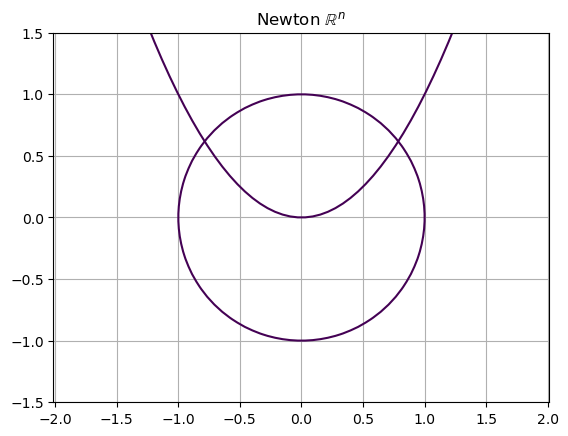

In [12]:
plt.figure()
CS1 = plt.contour(X, Y, Z1,levels=[0])
CS2 = plt.contour(X, Y, Z2,levels=[0])
plt.grid()
plt.axis('equal')
plt.title(r'Newton $\mathbb{R}^n$')
plt.show()

Here we implement the Newton's method in higher dimension in a widget.
Most of the code is for plotting and showing the outcome, but the core, i.e. the Newton steps, is just 1 line of code!

In [19]:
def Show_Newton(x0=1.2,y0=0.3,n=0):
    plt.figure()
    CS1 = plt.contour(X, Y, Z1,levels=[0])
    CS2 = plt.contour(X, Y, Z2,levels=[0])
    plt.grid()
    plt.axis('equal')
    plt.title(r'Newton $\mathbb{R}^n$')
    plt.plot(x0,y0,'rx')
    x_previous = np.array([x0,y0])
    print('Initial guess: [%.10f, %.10f]' % (x0,y0))
    for i in np.arange(n):
        x_next=NewtonStep(x_previous)
        x1,y1 = x_next
        plt.plot(x1,y1,'rx')
        plt.plot([x0, x1],[y0, y1],'r')
        x0=x1
        y0=y1
        x_previous = x_next
        print('Iteration %d  : [%.10f, %.10f]' % (i+1,x1,y1))
    plt.show()

In [20]:
interact(Show_Newton,x0=(-1.4,1.4,0.1),y0=(-1.4,1.4,0.1), n=(0,100,1))

interactive(children=(FloatSlider(value=1.2, description='x0', max=1.4, min=-1.4), FloatSlider(value=0.3, desc…

<function __main__.Show_Newton(x0=1.2, y0=0.3, n=0)>

<a id="py"></a>

## Python Modules and Functions
[Back to TOC](#toc)

**Newton's method**:
Here is the reference to the Newton's Method in Scipy, I suggest to take a look!

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

**Broyden**:
An alternative method is the Bryden's method. The Broyden's method is analogous to the Secant method in 1D, this means that we replace the approximation of the 'derivate' (which is actually the Jacobian matrix) for an approximation.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.broyden1.html#scipy.optimize.broyden1
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.broyden2.html#scipy.optimize.broyden2

**Minimization**:
This is an alternative path for solving a square nonlinear system of equations, recall that if there exists a solution to a nonlinear system of equation, it means that there exists a vector $\mathbf{r}$ such that $\mathbf{F}(\mathbf{r})=\mathbf{0}$. 
So, this will be equivalent to finding the minimum of the following function $g(\mathbf{x})=\|\mathbf{F}(\mathbf{x})\|$. 
Thus, we could tackle this problen then as a minimization of $g(\mathbf{x})$.
It depends on the context if this will be useful or not!
But it is important to know this is an alternative.

https://docs.scipy.org/doc/scipy/reference/optimize.html

<a id="acknowledgements"></a>

# Acknowledgements
[Back to TOC](#toc)
* _Material created by professor Claudio Torres_ (`ctorres@inf.utfsm.cl`). DI UTFSM. April 2018._
* _Update June 2020 - v1.15 - C.Torres_ : Fixing formatting issues.
* _Update May 2021 - v1.02 - C.Torres_ : Fixing formatting issues. Adding link to toc.
* _Update May 2021 - v1.03 - C.Torres_ : Improving implementation usign vectorization. Adding comments in the 'Python Modules and Functions' section.
* _Update May 2021 - v1.04 - C.Torres_ : Bug found by Jorge Sanhueza Céspedes in function 'Show_Newton', it was missing the line 'x_previous = x_next'. Thanks Jorge! We also updated the way the iteration umber is showed, basically we added +1 to the iterator 'i' in the 'print' function.
* _Update October 2021 - v1.05 - C.Torres_ : Fixing deprecated option np.float and replaceing it by float.
* _Update April 2024 - v1.06 - C.Torres_ : Adding the mathematical initial notation and context.
* _Update September 2024 - v1.07 - C.Torres_ : Changing from mathbb to mathbf at the very beginning.
* _Update March 2025 - v1.08 - C.Torres_ : Adding Colab link.
* _Update September 2025 - v1.09 - C.Torres_ : Adding Colab requirements, fixing anchors and updating title.